# Heart Stroke Prediction

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import the Dataset

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Drop unnecessary columns

In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Handle Data Imbalancement

In [6]:
minor=df[df["stroke"]==1]
major=df[df["stroke"]==0]

In [7]:
from sklearn.utils import resample

In [8]:
minor_new=resample(minor,replace=True,n_samples=len(major),random_state=42)

In [9]:
df=pd.concat([minor_new,major])

In [10]:
df=df.sample(frac=1)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3520,Male,18.0,0,0,No,Self-employed,Urban,74.00,23.7,Unknown,0
4494,Male,54.0,0,0,No,Private,Rural,106.52,27.4,formerly smoked,0
154,Female,55.0,0,0,Yes,Self-employed,Rural,92.98,25.6,never smoked,1
119,Female,77.0,0,0,Yes,Private,Urban,105.22,31.0,never smoked,1
38,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
2377,Female,28.0,0,0,Yes,Private,Rural,97.06,23.2,Unknown,0
82,Female,79.0,0,0,No,Private,Rural,88.92,22.9,never smoked,1
1572,Male,12.0,0,0,No,children,Urban,64.08,18.2,Unknown,0
4112,Female,36.0,0,0,Yes,Private,Urban,72.16,23.2,never smoked,0


## Divide Data into Independent and Dependent Features

In [12]:
x=df.drop("stroke",axis=1)

In [13]:
y=df["stroke"]

In [14]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3520,Male,18.0,0,0,No,Self-employed,Urban,74.00,23.7,Unknown
4494,Male,54.0,0,0,No,Private,Rural,106.52,27.4,formerly smoked
154,Female,55.0,0,0,Yes,Self-employed,Rural,92.98,25.6,never smoked
119,Female,77.0,0,0,Yes,Private,Urban,105.22,31.0,never smoked
38,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown
...,...,...,...,...,...,...,...,...,...,...
2377,Female,28.0,0,0,Yes,Private,Rural,97.06,23.2,Unknown
82,Female,79.0,0,0,No,Private,Rural,88.92,22.9,never smoked
1572,Male,12.0,0,0,No,children,Urban,64.08,18.2,Unknown
4112,Female,36.0,0,0,Yes,Private,Urban,72.16,23.2,never smoked


## Divide data into Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Automate the Preprocessing

### Import Required Libraries

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Seperate categorical and non categorical features

In [18]:
cat_fea=["gender","ever_married","work_type","Residence_type","smoking_status"]
num_fea=["age","hypertension","heart_disease","avg_glucose_level","bmi"]

In [19]:
cat_pipe=Pipeline(
    
    steps=[
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("encode",OneHotEncoder())
        
    ]

    
)

In [20]:
num_pipe=Pipeline(
    
    steps=[
        ("impute",SimpleImputer(strategy="median")),
        ("scaler",MinMaxScaler())
        
    ]

    
)

In [21]:
fe=ColumnTransformer([
    ("cat_pipe",cat_pipe,cat_fea),
    ("num_pipe",num_pipe,num_fea)
])

### Transform X

In [22]:
x=pd.DataFrame(fe.fit_transform(x))

In [23]:
import pickle
pickle.dump(fe,open("automate.pkl","wb"))

## Divide data into Training and Testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Import the Models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
models=[LogisticRegression,DecisionTreeClassifier,SVC,RandomForestClassifier]

In [28]:
d={}
for i in models:
    model=i()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    d[i]=round(accuracy_score(y_test,y_pred),2)

In [29]:
d

{sklearn.linear_model._logistic.LogisticRegression: 0.78,
 sklearn.tree._classes.DecisionTreeClassifier: 0.97,
 sklearn.svm._classes.SVC: 0.81,
 sklearn.ensemble._forest.RandomForestClassifier: 0.99}

In [30]:
model=RandomForestClassifier()

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=model.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.9921842863019333

In [34]:
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'Predicted')

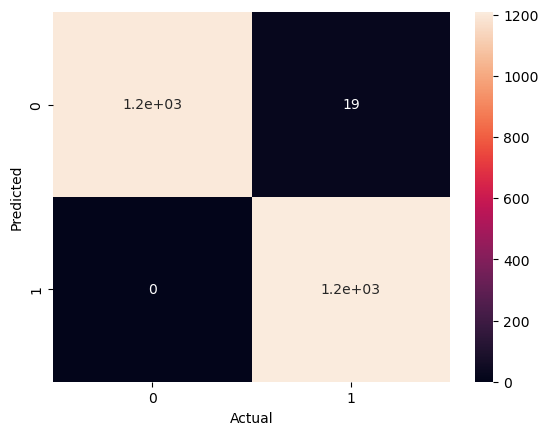

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [36]:
import pickle
pickle.dump(model,open("rand.pkl","wb"))